## Linear regression with one variable
1. [读取数据](#读取数据)
2. [画出数据点](#画出数据点)
3. [构建模型](#构建模型)
4. [动态演示迭代优化的过程](#动态演示迭代优化的过程)
5. [画出loss随theta变化的三维平面图以及等高线图](#画出loss随theta变化的三维平面图以及等高线图)
5. [另一种画三维散点图的方式](#另一种画三维散点图的方式)
5. [另一中在3维图中添加标注方法](#另一中在3维图中添加标注方法)

In [1]:
%matplotlib inline
# %pylab
import numpy as np
import matplotlib.animation as animation 
import matplotlib.pyplot as plt
from matplotlib import style 
import theano
import theano.tensor as T

/home/lsr/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
Using gpu device 0: GeForce GTX 750 Ti (CNMeM is disabled, CuDNN 3007)


###  读取数据

In [2]:
data = []
with open('ex1data1.txt', 'r') as f:
    for line in f:
        data.append(map(float,line.strip().split(',')))
data = np.array(data)     
m = len(data)

### 画出数据点

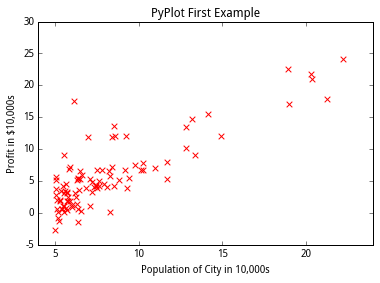

In [3]:
# 定义图表
# style.use('fivethirtyeight') 
fig = plt.figure() 
ax1 = fig.add_subplot(1,1,1)

plt.scatter(data[:,0], data[:,1], s=32, c='red', marker='x')
plt.title("PyPlot First Example")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.xlim(4, 24)
plt.show()

In [4]:
# 构造样本与标签, 样本第一列为1
xt = np.ones((m,2))
xt[:, 1] =  data[:,0]
labelt = np.zeros((m, 1))
labelt[:, 0] = data[:, 1]

### 构建模型

cost function(square-error loss):   
$$J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left(h_{\theta} (x^{(i)}) - y^{(i)} \right)^2$$
the hypothesis $h_{\theta} (x)$ is given by the linear model:  
$$h_{\theta} (x) = \theta^Tx = \theta_0 + \theta_1 x _1$$

In [5]:
x = T.matrix(name='x', dtype='float64') #  (97 2)
theta_np = np.zeros((2,1),dtype='float64') 
label = T.matrix(name='label', dtype='float64') # (97 1)
alpha = T.scalar(name='alpha', dtype='float64')
theta = theano.shared(theta_np, name='theta') # (2, 1),   

In [6]:
y = x.dot(theta) # (97, 1)
predict = theano.function([x], y)
loss = T.mean((y - label) ** 2) / 2 # square-error loss
calcLoss = theano.function([x, label], loss) 
grad_0 = T.mean(y - label) # 手动公式求导, scalar
grad_1 = T.mean((y - label) * (x[:, 1]).dimshuffle(0, 'x')) #  (y-label)的shape是(97,1),而x[:, 1]的shape是(97,)所有需要使用dimshuffle变成(97,1)
gradient_step = theano.function([x, label, alpha],updates={theta : theta - alpha * (T.stack([grad_0, grad_1])).dimshuffle(0, 'x')}) # 进行一次梯度下降, 使用stack构成(2,)的shape

In [7]:
grad = T.grad(loss, theta) # 自动求导
gradient_step_auto = theano.function([x, label, alpha],updates={theta : theta - alpha * grad}) # 自动求导的梯度下降

In [8]:
calcLoss(xt, labelt)

array(32.072733877455654)

### 动态演示迭代优化的过程

In [9]:
def animate(i):
    axis = plt.gca()
    axis.clear()
    plt.scatter(data[:,0], data[:,1], s=32, c='red', marker='x')
    plt.title("PyPlot First Example")
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.xlim(4, 24)
    plt.grid(True) 
    gradient_step_auto(xt, labelt, 0.01) # 或者gradient_step(xt, labelt, 0.01) 
    axis.plot(xt[:,1],xt.dot(theta.get_value()))

In [11]:
 # 显示动画不能用inline模式
%matplotlib auto
fig = plt.figure() 
ax1 = fig.add_subplot(1,1,1)
ani = animation.FuncAnimation(fig, animate, frames=2000, interval = 1) # 每ms调用一次animate绘图,并训练一个epoch

Using matplotlib backend: Qt4Agg


In [ ]:
#HTML(ani.to_html5_video())

[[-3.89530051]
 [ 1.19298539]]


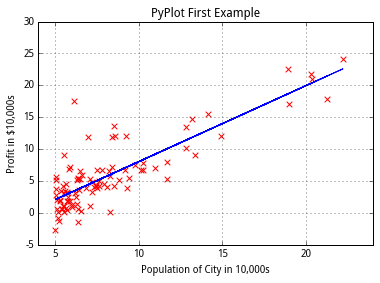

In [13]:
# 不进行动画演示直接训练train
%matplotlib inline
theta.set_value(theta_np) # 参数复位0
for i in range(5000):
    gradient_step(xt, labelt, 0.01)
thetaResult = theta.get_value() # 取得参数

# 画出回归直线
plt.figure()
plt.scatter(data[:,0], data[:,1], s=32, c='red', marker='x')
plt.title("PyPlot First Example")
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.xlim(4, 24)
plt.grid(True) 
plt.plot(xt[:,1],xt.dot(theta.get_value()))
print thetaResult

### 画出loss随theta变化的三维平面图以及等高线图

8

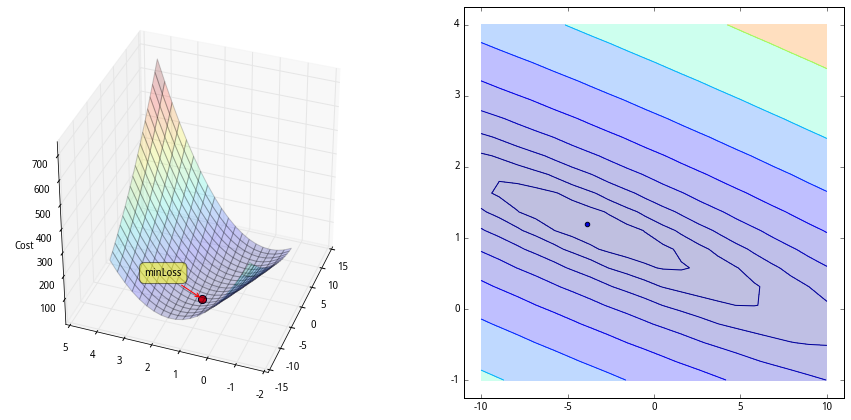

In [41]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

# 定义三维图像
fig3D =  plt.figure(figsize=(15,7))
ax3D = fig3D.add_subplot(121, projection = '3d')  #ax3D = Axes3D(fig3D) 或者 ax3D = fig.gca(projection='3d'),这两种不知道怎么添加子图
axCt = fig3D.add_subplot(122)

thetaA = thetaResult[0, 0]
thetaB = thetaResult[1, 0]

thetaA_vals = np.linspace(-10, 10, 20, endpoint=True)
thetaB_vals = np.linspace(-1, 4, 20, endpoint=True)
J_vals = np.zeros((len(thetaA_vals), len(thetaB_vals)))
X, Y = np.meshgrid(thetaA_vals, thetaB_vals)
"""
for i, b in enumerate(thetaB_vals): # 由于meshgrid的机制,需要先遍历thetaB_vals
    for j, a in enumerate(thetaA_vals):
        theta.set_value(np.array([[a], [b]], dtype='float32'))
        J_vals[i, j] = calcLoss(xt, labelt)
"""
# 推荐使用ndenumerate,符合meshgrid机制
for (i, j), _ in np.ndenumerate(J_vals):
        theta.set_value(np.array([[X[i, j]], [Y[i, j]]], dtype='float32'))
        J_vals[i, j] = calcLoss(xt, labelt) 

# 画出3维surface图
ax3D.plot_surface(X, Y,  J_vals, rstride=1, cstride=1, alpha=0.2, cmap=plt.cm.jet, shade=False) 
ax3D.set_zlabel('Cost')
ax3D.set_zlim(J_vals.min(), J_vals.max())
ax3D.view_init(elev=35, azim=200)

# 画出等高线图
axCt.scatter(thetaA, thetaB)
axCt.contourf(X, Y,  J_vals, np.logspace(-2, 3, 20), alpha=.25, cmap=plt.cm.jet)
C = axCt.contour(X, Y, J_vals, np.logspace(-2, 3, 20), linewidth=.5, cmap=plt.cm.jet)

# 为三维平面图中的最优解添加动态标注
theta.set_value(thetaResult) # theta最优点
minLoss = calcLoss(xt, labelt) # 最小loss

sc = ax3D.scatter(thetaA, thetaB, minLoss, s = 66, c = 'r') # 画出最优点,看不见....要翻转

x2, y2, _ = proj3d.proj_transform(thetaA, thetaB, minLoss, ax3D.get_proj()) # 投影

label = ax3D.annotate(
    "minLoss", 
    xy = (x2, y2), xytext = (-20, 20), # 坐标为x2, y2
    textcoords = 'offset points', ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='red')) # 定义标注

def update_position(e): # 移动3维图时更新标注
    x2, y2, _ = proj3d.proj_transform(thetaA, thetaB, minLoss, ax3D.get_proj()) # 重新计算投影
    label.xy = x2,y2
    label.update_positions(fig3D.canvas.renderer) # 更新坐标
    fig3D.canvas.draw()
fig3D.canvas.mpl_connect('motion_notify_event', update_position) # 绑定事件

### 另一种画三维散点图的方式

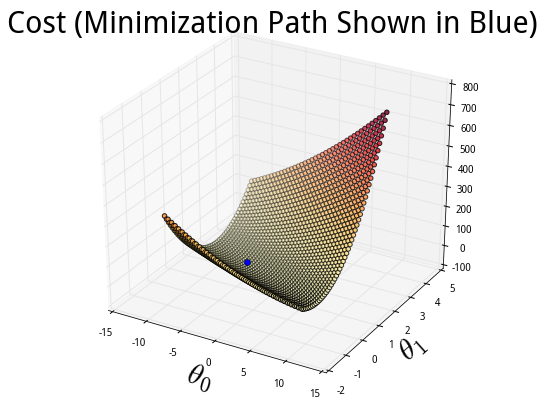

In [42]:
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
import itertools

fig = plt.figure(figsize=(8,7))
ax = fig.gca(projection='3d')

xvals = np.arange(-10,10,.5)
yvals = np.arange(-1,4,.1)
myxs, myys, myzs = [], [], []
for david in xvals: # 计算所有要画的点
    for kaleko in yvals:
        myxs.append(david)
        myys.append(kaleko)
        theta.set_value(np.array([[david], [kaleko]], dtype='float32'))
        myzs.append(calcLoss(xt, labelt))

scat = ax.scatter(myxs,myys,myzs,c=np.abs(myzs),cmap=plt.get_cmap('YlOrRd')) # 画点阵模拟平面
plt.xlabel(r'$\theta_0$',fontsize=30)
plt.ylabel(r'$\theta_1$',fontsize=30)
plt.title('Cost (Minimization Path Shown in Blue)',fontsize=30)
plt.plot([thetaA], [thetaB], [minLoss],'bo-') # 画出最优点
plt.show()

In [ ]:
theta.set_value(theta_np) # 参数复位0

### 另一中在3维图中添加标注方法

In [47]:
%matplotlib auto

Using matplotlib backend: Qt4Agg


In [48]:
def visualize3DData (X):
    """Visualize data in 3d plot with popover next to mouse position.

    Args:
        X (np.array) - array of points, of shape (numPoints, 3)
    Returns:
        None
    """
    fig = plt.figure(figsize = (16,10))
    ax = fig.add_subplot(111, projection = '3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], depthshade = False, picker = True)


    def distance(point, event):
        """Return distance between mouse position and given data point

        Args:
            point (np.array): np.array of shape (3,), with x,y,z in data coords
            event (MouseEvent): mouse event (which contains mouse position in .x and .xdata)
        Returns:
            distance (np.float64): distance (in screen coords) between mouse pos and data point
        """
        assert point.shape == (3,), "distance: point.shape is wrong: %s, must be (3,)" % point.shape

        # Project 3d data space to 2d data space
        x2, y2, _ = proj3d.proj_transform(point[0], point[1], point[2], plt.gca().get_proj())
        # Convert 2d data space to 2d screen space
        x3, y3 = ax.transData.transform((x2, y2))

        return np.sqrt ((x3 - event.x)**2 + (y3 - event.y)**2)


    def calcClosestDatapoint(X, event):
        """"Calculate which data point is closest to the mouse position.

        Args:
            X (np.array) - array of points, of shape (numPoints, 3)
            event (MouseEvent) - mouse event (containing mouse position)
        Returns:
            smallestIndex (int) - the index (into the array of points X) of the element closest to the mouse position
        """
        distances = [distance (X[i, 0:3], event) for i in range(X.shape[0])]
        return np.argmin(distances)


    def annotatePlot(X, index):
        """Create popover label in 3d chart

        Args:
            X (np.array) - array of points, of shape (numPoints, 3)
            index (int) - index (into points array X) of item which should be printed
        Returns:
            None
        """
        # If we have previously displayed another label, remove it first
        if hasattr(annotatePlot, 'label'):
            annotatePlot.label.remove()
        # Get data point from array of points X, at position index
        x2, y2, _ = proj3d.proj_transform(X[index, 0], X[index, 1], X[index, 2], ax.get_proj())
        annotatePlot.label = plt.annotate( "Value %d" % index,
            xy = (x2, y2), xytext = (-20, 20), textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0', color='red'))
        fig.canvas.draw()


    def onMouseMotion(event):
        """Event that is triggered when mouse is moved. Shows text annotation over data point closest to mouse."""
        closestIndex = calcClosestDatapoint(X, event)
        annotatePlot (X, closestIndex)

    fig.canvas.mpl_connect('motion_notify_event', onMouseMotion)  # on mouse motion
    plt.show()



XX = np.random.random((30,3))
visualize3DData (XX)